In [1]:
from qutip import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.linewidth'] = 1.5

plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

Functions

In [2]:
X = sigmax()
Y = sigmay()
Z = sigmaz()
I = qeye(2)

def Isingx(N, edges, h=1):
    global X,Y,Z,I
    matrices = [I for i in range(N)]
    sumsigmax = 0
    sumsigmazz = 0
    if type(h) is int:
        h *= np.ones(N)
#     if type(J) is int:
#         J *= np.ones(len(edges))        
    for i in range(N):
        matrices[i] = X
        sumsigmax += h[i]*tensor(matrices)
        matrices[i] = I
    for i in range(len(edges)):
        matrices[edges[i][0]] = Z
        matrices[edges[i][1]] = Z
        sumsigmazz += edges[i][2]*tensor(matrices)
        matrices[edges[i][0]] = I
        matrices[edges[i][1]] = I  
    H = sumsigmazz + sumsigmax
    return H


def Hxxx(N, edges, h=1):
    global X,Y,Z,I
    matrices = [I for i in range(N)]
    sumsigmaz = 0
    sumsigmaxx = 0
    sumsigmayy = 0
    sumsigmazz = 0
    if type(h) is int:
        h *= np.ones(N)
#     if type(J) is int:
#         J *= np.ones(len(edges))        
    for i in range(N):
        matrices[i] = Z
        sumsigmaz += h[i]*tensor(matrices)
        matrices[i] = I    
    for i in range(len(edges)):
        matrices[edges[i][0]] = X
        matrices[edges[i][1]] = X
        sumsigmaxx += edges[i][2]*tensor(matrices)
#         matrices[edges[i][0]] = I
#         matrices[edges[i][1]] = I
        matrices[edges[i][0]] = Y
        matrices[edges[i][1]] = Y
        sumsigmayy += edges[i][2]*tensor(matrices)
#         matrices[edges[i][0]] = I
#         matrices[edges[i][1]] = I
        matrices[edges[i][0]] = Z
        matrices[edges[i][1]] = Z
        sumsigmazz += edges[i][2]*tensor(matrices)
        matrices[edges[i][0]] = I
        matrices[edges[i][1]] = I  
    H = sumsigmaxx+sumsigmazz+sumsigmayy+ sumsigmaz
    return H

def excstate(N):
    up = tensor([basis(2,1) for n in range(N)])
    state = up*up.dag()
    return state

def charge(H0, Htot, ancilla, target, tracekeep, times):
    fidel = []
    ergotropy = []
    t = np.linspace(0,1,100)
    _, gsket = Htot.groundstate()
    Rin = gsket*gsket.dag()
    Rt0 = mesolve(Htot,Rin,t)
    Rtstates0 = Rt0.states[-1].unit()
    Rsyst_red0 = ptrace(Rtstates0,tracekeep)
    W0 = (Rsyst_red0*H0).tr()
    HsystEigEn = H0.eigenenergies(sparse=False, sort='low', eigvals=0, tol=0, maxiter=100000)
    for r in range(times):
        Rt = mesolve(Htot,Rin,t)
        Rtstates = Rt.states[-1].unit()
        Rsyst_red = ptrace(Rtstates,tracekeep).unit()
        RsystEigVal = Rsyst_red.eigenenergies(sparse=False, sort='high', eigvals=0, tol=0, maxiter=100000)
        ergotropy.append(W0 - np.sum(RsystEigVal*HsystEigEn)) 
        fidel.append(fidelity(target,Rsyst_red))
        Rin=tensor(ancilla,Rsyst_red)
    return ergotropy, fidel 

General Settings to Use Later

In [3]:
h = 1 
N0 = 4
times, realizations = 100 , 100
std_list = np.linspace(.1,.8,8)
t = np.linspace(0,1,100)


"""
edges0 = [[0,1,J[0]],[1,2,J[1]],[2,3,J[2]],[3,1,J[3]]]
edges1 = [[0,1,g[0]],[1,2,J[0]],[2,3,J[1]],[3,4,J[2]],[4,1,J[3]]]
edges20= [[0,2,g[0]],[1,3,g[1]],[2,3,J[0]],[3,4,J[1]],[4,5,J[2]],[5,2,J[3]]]
edges21= [[0,1,p[0]],[0,2,g[0]],[1,3,g[1]],[2,3,J[0]],[3,4,J[1]],[4,5,J[2]],[5,2,J[3]]]
edges30= [[0,3,g[0]],[1,4,g[1]],[2,5,g[2]],[3,4,J[0]],[4,5,J[1]],[5,6,J[2]],[6,3,J[3]]]
edges33= [[0,1,p[0]],[1,2,p[1]],[2,0,p[2]],[0,3,g[0]],[1,4,g[1]],[2,5,g[2]],[3,4,J[0]],[4,5,J[1]],[5,6,J[2]],[6,3,J[3]]]
edges40= [[0,4,g[0]],[1,5,g[1]],[2,6,g[2]],[3,7,g[3]],[4,5,J[0]],[5,6,J[1]],[6,7,J[2]],[7,4,J[3]]]
edges44= [[0,1,p[0]],[1,2,p[1]],[2,3,p[2]],[3,1,p[3]],[0,4,g[0]],[1,5,g[1]],[2,6,g[2]],[3,7,g[3]],[4,5,J[0]],[5,6,J[1]],[6,7,J[2]],[7,4,J[3]]]"""

'\nedges0 = [[0,1,J[0]],[1,2,J[1]],[2,3,J[2]],[3,1,J[3]]]\nedges1 = [[0,1,g[0]],[1,2,J[0]],[2,3,J[1]],[3,4,J[2]],[4,1,J[3]]]\nedges20= [[0,2,g[0]],[1,3,g[1]],[2,3,J[0]],[3,4,J[1]],[4,5,J[2]],[5,2,J[3]]]\nedges21= [[0,1,p[0]],[0,2,g[0]],[1,3,g[1]],[2,3,J[0]],[3,4,J[1]],[4,5,J[2]],[5,2,J[3]]]\nedges30= [[0,3,g[0]],[1,4,g[1]],[2,5,g[2]],[3,4,J[0]],[4,5,J[1]],[5,6,J[2]],[6,3,J[3]]]\nedges33= [[0,1,p[0]],[1,2,p[1]],[2,0,p[2]],[0,3,g[0]],[1,4,g[1]],[2,5,g[2]],[3,4,J[0]],[4,5,J[1]],[5,6,J[2]],[6,3,J[3]]]\nedges40= [[0,4,g[0]],[1,5,g[1]],[2,6,g[2]],[3,7,g[3]],[4,5,J[0]],[5,6,J[1]],[6,7,J[2]],[7,4,J[3]]]\nedges44= [[0,1,p[0]],[1,2,p[1]],[2,3,p[2]],[3,1,p[3]],[0,4,g[0]],[1,5,g[1]],[2,6,g[2]],[3,7,g[3]],[4,5,J[0]],[5,6,J[1]],[6,7,J[2]],[7,4,J[3]]]'

* Battery: Ising with Gaussian J Configurations
* Charger: Uniform Environment
* Fidelity and Ergotropy Calculation

In [ ]:
#1-0

N = 5 
fidelity1 = np.zeros(shape=(len(std_list), times))
ergotropy1 = np.zeros(shape=(len(std_list), times))

for i, sigma in enumerate(std_list):

    fid_ = np.zeros(shape=(realizations, times))
    erg_ = np.zeros(shape=(realizations, times))

    for j in range(realizations):

        J = np.random.normal(loc=0, scale=sigma, size=N0)
        g = [1,1,1,1]
        p = [1,1,1,1]
        edges0 = [[0,1,J[0]],[1,2,J[1]],[2,3,J[2]],[3,1,J[3]]]
        edges1 = [[0,1,g[0]],[1,2,J[0]],[2,3,J[1]],[3,4,J[2]],[4,1,J[3]]]

        H0 = Hxxx(N0, edges0)
        Htot = Hxxx(N, edges1)
        ancilla = excstate(N-N0)
        target = excstate(N0)
        tracekeep = np.arange((N-N0),N,1)
        e , f  = charge(H0, Htot, ancilla, target, tracekeep, times)
        fid_[j,::] = np.array(f)
        erg_[j,::] = np.array(e)

    fidelity1[i,::] = np.mean(fid_, axis=0) 
    ergotropy1[i,::] = np.mean(erg_, axis=0)

fig, axs = plt.subplots(1,2,figsize=(12,8), dpi=100)
plt.subplots_adjust(wspace=0,hspace=0)

for i, sigma in enumerate(std_list):
    axs[0].plot(t,fidelity1[i], label = r'$\sigma:$'+str(sigma))
    axs[1].plot(t,ergotropy1[i], label= r'$\sigma:$'+str(sigma))
    axs[0].set_ylabel(r'Fidelity')
    axs[1].set_ylabel(r'Ergotropy',labelpad=-400)

axs[1].set_xticks(axs[1].get_xticks()[2:-1])
axs[1].tick_params(labelleft=False,labelright=True)

for idx in [0,1]:
    axs[idx].legend(fontsize=12)
    axs[idx].set_xlabel('$\\tau$')
    
    for e in ['x', 'y']:
        axs[idx].tick_params(axis=e,which='major',size=8,width=1,direction='in',top='on',right='on')


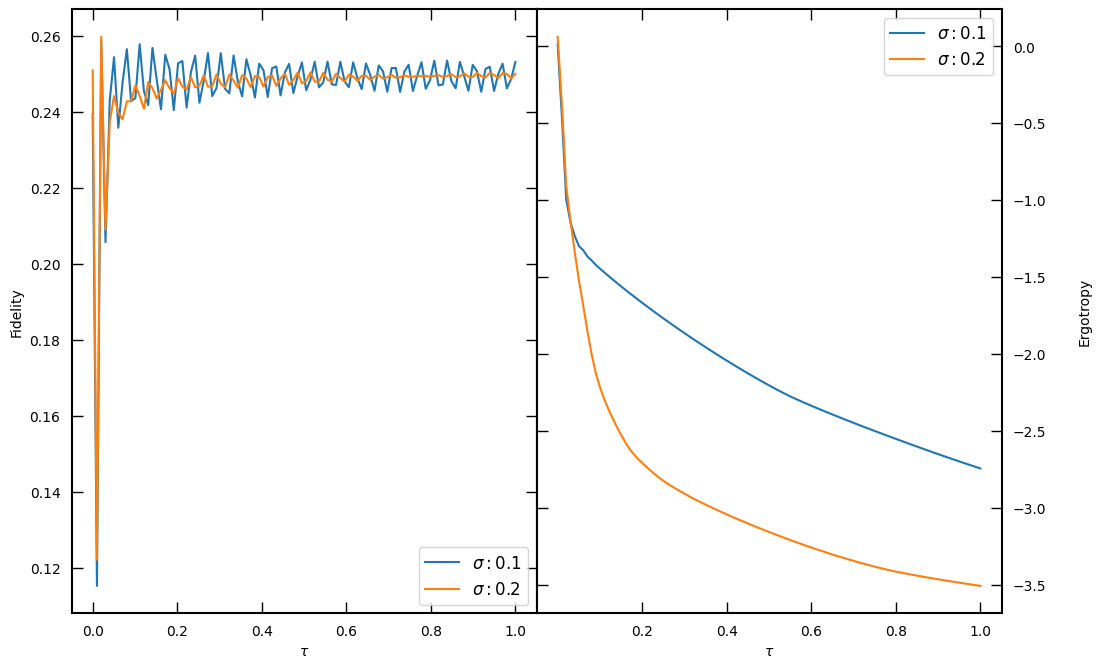

In [19]:
#2-0

N = 6
fidelity20 = np.zeros(shape=(len(std_list), times))
ergotropy20 = np.zeros(shape=(len(std_list), times))

for i, sigma in enumerate(std_list):

    fid_ = np.zeros(shape=(realizations, times))
    erg_ = np.zeros(shape=(realizations, times))

    for j in range(realizations):

        J = np.random.normal(loc=0, scale=sigma, size=N0)
        g = [1,1,1,1]
        p = [1,1,1,1]
        edges0 = [[0,1,J[0]],[1,2,J[1]],[2,3,J[2]],[3,1,J[3]]]
        edges20= [[0,2,g[0]],[1,3,g[1]],[2,3,J[0]],[3,4,J[1]],[4,5,J[2]],[5,2,J[3]]]

        H0 = Hxxx(N0, edges0)
        Htot = Hxxx(N, edges20)
        ancilla = excstate(N-N0)
        target = excstate(N0)
        tracekeep = np.arange((N-N0),N,1)
        e , f  = charge(H0, Htot, ancilla, target, tracekeep, times)
        fid_[j,::] = np.array(f)
        erg_[j,::] = np.array(e)

    fidelity20[i,::] = np.mean(fid_, axis=0) 
    ergotropy20[i,::] = np.mean(erg_, axis=0)

fig, axs = plt.subplots(1,2,figsize=(12,8), dpi=100)
plt.subplots_adjust(wspace=0,hspace=0)

for i, sigma in enumerate(std_list):
    axs[0].plot(t,fidelity20[i], label = r'$\sigma:$'+str(sigma))
    axs[1].plot(t,ergotropy20[i], label= r'$\sigma:$'+str(sigma))
    axs[0].set_ylabel(r'Fidelity')
    axs[1].set_ylabel(r'Ergotropy',labelpad=-400)

axs[1].set_xticks(axs[1].get_xticks()[2:-1])
axs[1].tick_params(labelleft=False,labelright=True)

for idx in [0,1]:
    axs[idx].legend(fontsize=12)
    axs[idx].set_xlabel('$\\tau$')
    
    for e in ['x', 'y']:
        axs[idx].tick_params(axis=e,which='major',size=8,width=1,direction='in',top='on',right='on')


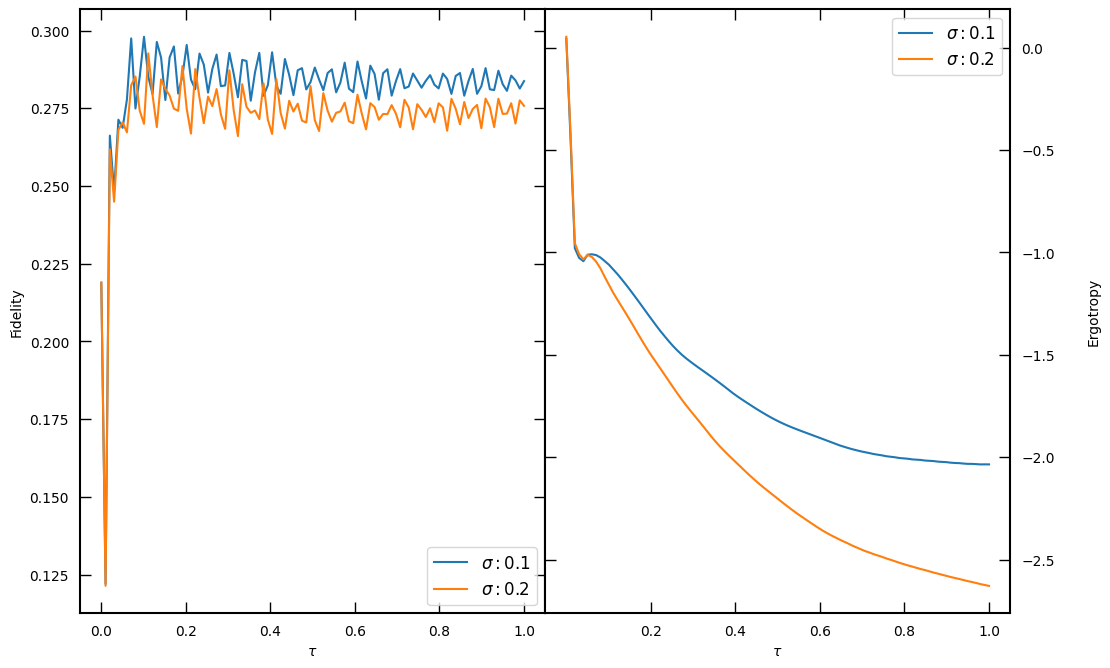

In [20]:
#2-1

N = 6
fidelity21 = np.zeros(shape=(len(std_list), times))
ergotropy21 = np.zeros(shape=(len(std_list), times))

for i, sigma in enumerate(std_list):

    fid_ = np.zeros(shape=(realizations, times))
    erg_ = np.zeros(shape=(realizations, times))

    for j in range(realizations):

        J = np.random.normal(loc=0, scale=sigma, size=N0)
        g = [1,1,1,1]
        p = [1,1,1,1]
        edges0 = [[0,1,J[0]],[1,2,J[1]],[2,3,J[2]],[3,1,J[3]]]
        edges21= [[0,1,p[0]],[0,2,g[0]],[1,3,g[1]],[2,3,J[0]],[3,4,J[1]],[4,5,J[2]],[5,2,J[3]]]

        H0 = Hxxx(N0, edges0)
        Htot = Hxxx(N, edges21)
        ancilla = excstate(N-N0)
        target = excstate(N0)
        tracekeep = np.arange((N-N0),N,1)
        e , f  = charge(H0, Htot, ancilla, target, tracekeep, times)
        fid_[j,::] = np.array(f)
        erg_[j,::] = np.array(e)

    fidelity21[i,::] = np.mean(fid_, axis=0) 
    ergotropy21[i,::] = np.mean(erg_, axis=0)

fig, axs = plt.subplots(1,2,figsize=(12,8), dpi=100)
plt.subplots_adjust(wspace=0,hspace=0)

for i, sigma in enumerate(std_list):
    axs[0].plot(t,fidelity21[i], label = r'$\sigma:$'+str(sigma))
    axs[1].plot(t,ergotropy21[i], label= r'$\sigma:$'+str(sigma))
    axs[0].set_ylabel(r'Fidelity')
    axs[1].set_ylabel(r'Ergotropy',labelpad=-400)

axs[1].set_xticks(axs[1].get_xticks()[2:-1])
axs[1].tick_params(labelleft=False,labelright=True)

for idx in [0,1]:
    axs[idx].legend(fontsize=12)
    axs[idx].set_xlabel('$\\tau$')
    
    for e in ['x', 'y']:
        axs[idx].tick_params(axis=e,which='major',size=8,width=1,direction='in',top='on',right='on')


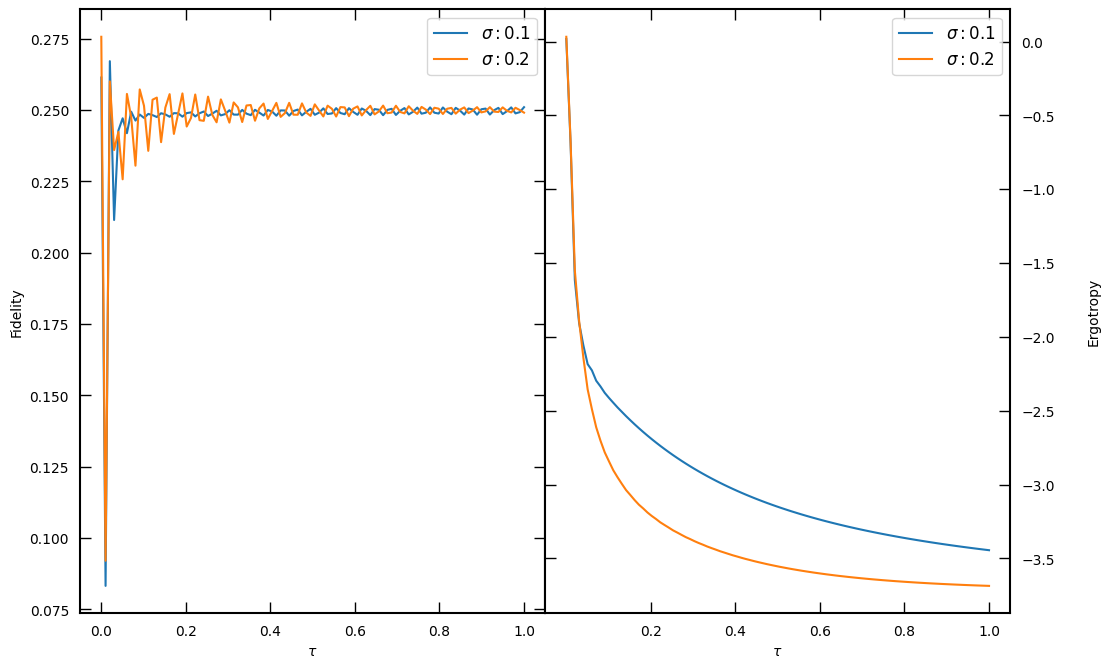

In [21]:
#3-0

N = 7
fidelity30 = np.zeros(shape=(len(std_list), times))
ergotropy30 = np.zeros(shape=(len(std_list), times))

for i, sigma in enumerate(std_list):

    fid_ = np.zeros(shape=(realizations, times))
    erg_ = np.zeros(shape=(realizations, times))

    for j in range(realizations):

        J = np.random.normal(loc=0, scale=sigma, size=N0)
        g = [1,1,1,1]
        p = [1,1,1,1]
        edges0 = [[0,1,J[0]],[1,2,J[1]],[2,3,J[2]],[3,1,J[3]]]
        edges30= [[0,3,g[0]],[1,4,g[1]],[2,5,g[2]],[3,4,J[0]],[4,5,J[1]],[5,6,J[2]],[6,3,J[3]]]

        H0 = Hxxx(N0, edges0)
        Htot = Hxxx(N, edges30)
        ancilla = excstate(N-N0)
        target = excstate(N0)
        tracekeep = np.arange((N-N0),N,1)
        e , f  = charge(H0, Htot, ancilla, target, tracekeep, times)
        fid_[j,::] = np.array(f)
        erg_[j,::] = np.array(e)

    fidelity30[i,::] = np.mean(fid_, axis=0) 
    ergotropy30[i,::] = np.mean(erg_, axis=0)

fig, axs = plt.subplots(1,2,figsize=(12,8), dpi=100)
plt.subplots_adjust(wspace=0,hspace=0)

for i, sigma in enumerate(std_list):
    axs[0].plot(t,fidelity30[i], label = r'$\sigma:$'+str(sigma))
    axs[1].plot(t,ergotropy30[i], label= r'$\sigma:$'+str(sigma))
    axs[0].set_ylabel(r'Fidelity')
    axs[1].set_ylabel(r'Ergotropy',labelpad=-400)

axs[1].set_xticks(axs[1].get_xticks()[2:-1])
axs[1].tick_params(labelleft=False,labelright=True)

for idx in [0,1]:
    axs[idx].legend(fontsize=12)
    axs[idx].set_xlabel('$\\tau$')
    
    for e in ['x', 'y']:
        axs[idx].tick_params(axis=e,which='major',size=8,width=1,direction='in',top='on',right='on')


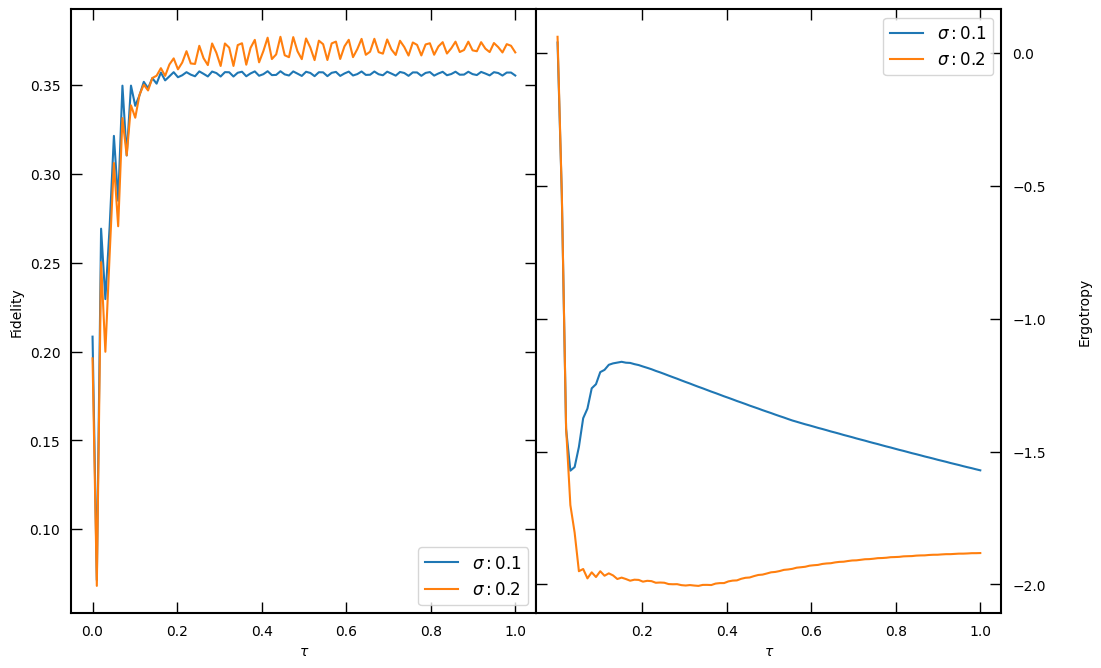

In [22]:
#3-3

N = 7
fidelity33 = np.zeros(shape=(len(std_list), times))
ergotropy33 = np.zeros(shape=(len(std_list), times))

for i, sigma in enumerate(std_list):

    fid_ = np.zeros(shape=(realizations, times))
    erg_ = np.zeros(shape=(realizations, times))

    for j in range(realizations):

        J = np.random.normal(loc=0, scale=sigma, size=N0)
        g = [1,1,1,1]
        p = [1,1,1,1]
        edges0 = [[0,1,J[0]],[1,2,J[1]],[2,3,J[2]],[3,1,J[3]]]
        edges33= [[0,1,p[0]],[1,2,p[1]],[2,0,p[2]],[0,3,g[0]],[1,4,g[1]],[2,5,g[2]],[3,4,J[0]],[4,5,J[1]],[5,6,J[2]],[6,3,J[3]]]

        H0 = Hxxx(N0, edges0)
        Htot = Hxxx(N, edges33)
        ancilla = excstate(N-N0)
        target = excstate(N0)
        tracekeep = np.arange((N-N0),N,1)
        e , f  = charge(H0, Htot, ancilla, target, tracekeep, times)
        fid_[j,::] = np.array(f)
        erg_[j,::] = np.array(e)

    fidelity33[i,::] = np.mean(fid_, axis=0) 
    ergotropy33[i,::] = np.mean(erg_, axis=0)

fig, axs = plt.subplots(1,2,figsize=(12,8), dpi=100)
plt.subplots_adjust(wspace=0,hspace=0)

for i, sigma in enumerate(std_list):
    axs[0].plot(t,fidelity33[i], label = r'$\sigma:$'+str(sigma))
    axs[1].plot(t,ergotropy33[i], label= r'$\sigma:$'+str(sigma))
    axs[0].set_ylabel(r'Fidelity')
    axs[1].set_ylabel(r'Ergotropy',labelpad=-400)

axs[1].set_xticks(axs[1].get_xticks()[2:-1])
axs[1].tick_params(labelleft=False,labelright=True)

for idx in [0,1]:
    axs[idx].legend(fontsize=12)
    axs[idx].set_xlabel('$\\tau$')
    
    for e in ['x', 'y']:
        axs[idx].tick_params(axis=e,which='major',size=8,width=1,direction='in',top='on',right='on')


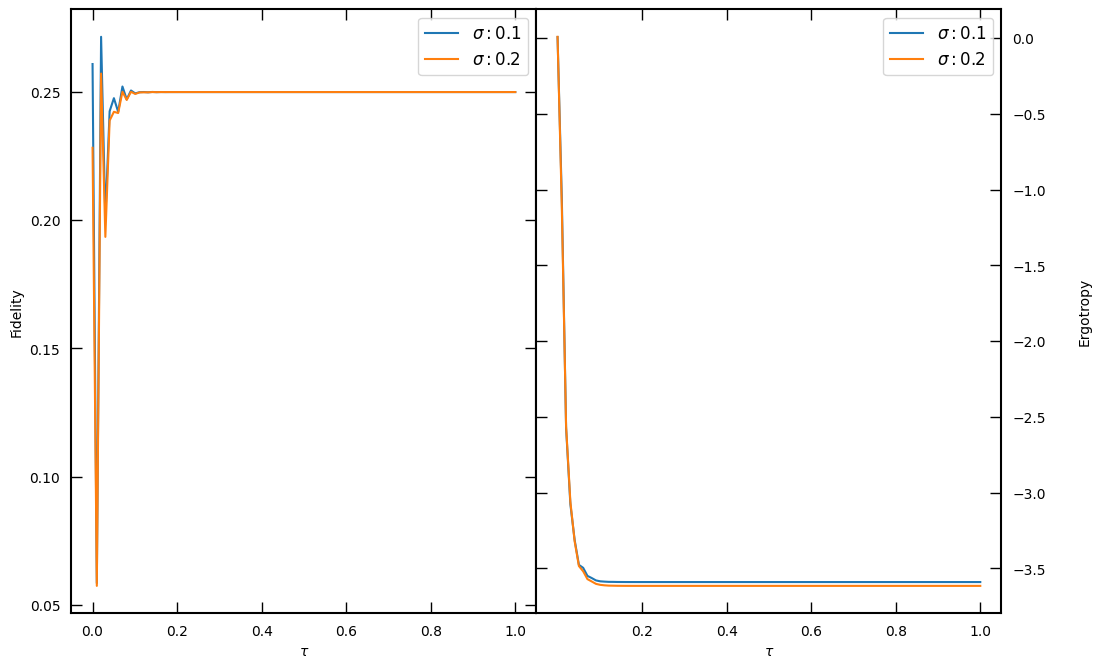

In [23]:
#4-0

N = 8
fidelity40 = np.zeros(shape=(len(std_list), times))
ergotropy40 = np.zeros(shape=(len(std_list), times))

for i, sigma in enumerate(std_list):

    fid_ = np.zeros(shape=(realizations, times))
    erg_ = np.zeros(shape=(realizations, times))

    for j in range(realizations):

        J = np.random.normal(loc=0, scale=sigma, size=N0)
        g = [1,1,1,1]
        p = [1,1,1,1]
        edges0 = [[0,1,J[0]],[1,2,J[1]],[2,3,J[2]],[3,1,J[3]]]
        edges40= [[0,4,g[0]],[1,5,g[1]],[2,6,g[2]],[3,7,g[3]],[4,5,J[0]],[5,6,J[1]],[6,7,J[2]],[7,4,J[3]]]

        H0 = Hxxx(N0, edges0)
        Htot = Hxxx(N, edges40)
        ancilla = excstate(N-N0)
        target = excstate(N0)
        tracekeep = np.arange((N-N0),N,1)
        e , f  = charge(H0, Htot, ancilla, target, tracekeep, times)
        fid_[j,::] = np.array(f)
        erg_[j,::] = np.array(e)

    fidelity40[i,::] = np.mean(fid_, axis=0) 
    ergotropy40[i,::] = np.mean(erg_, axis=0)

fig, axs = plt.subplots(1,2,figsize=(12,8), dpi=100)
plt.subplots_adjust(wspace=0,hspace=0)

for i, sigma in enumerate(std_list):
    axs[0].plot(t,fidelity40[i], label = r'$\sigma:$'+str(sigma))
    axs[1].plot(t,ergotropy40[i], label= r'$\sigma:$'+str(sigma))
    axs[0].set_ylabel(r'Fidelity')
    axs[1].set_ylabel(r'Ergotropy',labelpad=-400)

axs[1].set_xticks(axs[1].get_xticks()[2:-1])
axs[1].tick_params(labelleft=False,labelright=True)

for idx in [0,1]:
    axs[idx].legend(fontsize=12)
    axs[idx].set_xlabel('$\\tau$')
    
    for e in ['x', 'y']:
        axs[idx].tick_params(axis=e,which='major',size=8,width=1,direction='in',top='on',right='on')


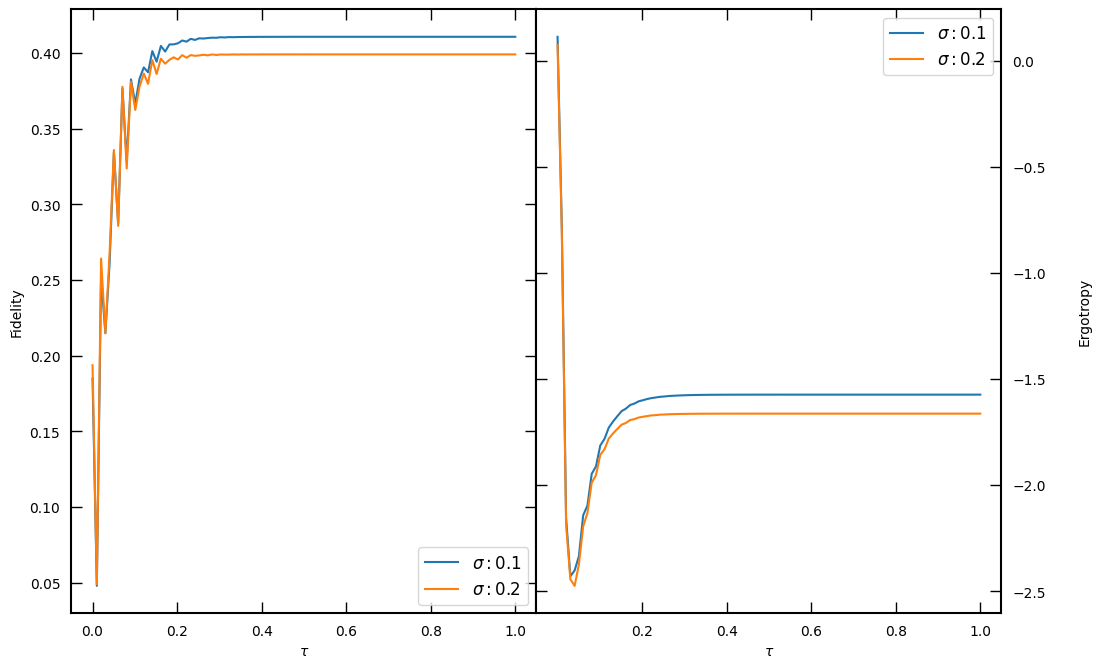

In [24]:
#4-4

N = 8
fidelity44 = np.zeros(shape=(len(std_list), times))
ergotropy44 = np.zeros(shape=(len(std_list), times))

for i, sigma in enumerate(std_list):

    fid_ = np.zeros(shape=(realizations, times))
    erg_ = np.zeros(shape=(realizations, times))

    for j in range(realizations):

        J = np.random.normal(loc=0, scale=sigma, size=N0)
        g = [1,1,1,1]
        p = [1,1,1,1]
        edges0 = [[0,1,J[0]],[1,2,J[1]],[2,3,J[2]],[3,1,J[3]]]
        edges44= [[0,1,p[0]],[1,2,p[1]],[2,3,p[2]],[3,1,p[3]],[0,4,g[0]],[1,5,g[1]],[2,6,g[2]],[3,7,g[3]],[4,5,J[0]],[5,6,J[1]],[6,7,J[2]],[7,4,J[3]]]

        H0 = Hxxx(N0, edges0)
        Htot = Hxxx(N, edges44)
        ancilla = excstate(N-N0)
        target = excstate(N0)
        tracekeep = np.arange((N-N0),N,1)
        e , f  = charge(H0, Htot, ancilla, target, tracekeep, times)
        fid_[j,::] = np.array(f)
        erg_[j,::] = np.array(e)

    fidelity44[i,::] = np.mean(fid_, axis=0) 
    ergotropy44[i,::] = np.mean(erg_, axis=0)

fig, axs = plt.subplots(1,2,figsize=(12,8), dpi=100)
plt.subplots_adjust(wspace=0,hspace=0)

for i, sigma in enumerate(std_list):
    axs[0].plot(t,fidelity44[i], label = r'$\sigma:$'+str(sigma))
    axs[1].plot(t,ergotropy44[i], label= r'$\sigma:$'+str(sigma))
    axs[0].set_ylabel(r'Fidelity')
    axs[1].set_ylabel(r'Ergotropy',labelpad=-400)

axs[1].set_xticks(axs[1].get_xticks()[2:-1])
axs[1].tick_params(labelleft=False,labelright=True)

for idx in [0,1]:
    axs[idx].legend(fontsize=12)
    axs[idx].set_xlabel('$\\tau$')
    
    for e in ['x', 'y']:
        axs[idx].tick_params(axis=e,which='major',size=8,width=1,direction='in',top='on',right='on')


* Charger Types Comparison for Given Deviation

In [26]:
charger_names = ['1-0', '2-0', '2-1', '3-0', '3-3', '4-0', '4-4']
fids = np.array([fidelity1, fidelity20, fidelity21, fidelity30, fidelity33, fidelity40, fidelity44])
ergs = np.array([ergotropy1, ergotropy20, ergotropy21, ergotropy30, ergotropy33, ergotropy40, ergotropy44])

Max Work for Charger Types

In [30]:
deltaW = np.zeros(shape=(len(std_list), len(charger_names)))
for i in range(len(std_list)):
    for j in range(len(charger_names)):
        deltaW[i,j] = max(ergs[j,i])-min(ergs[j,i])

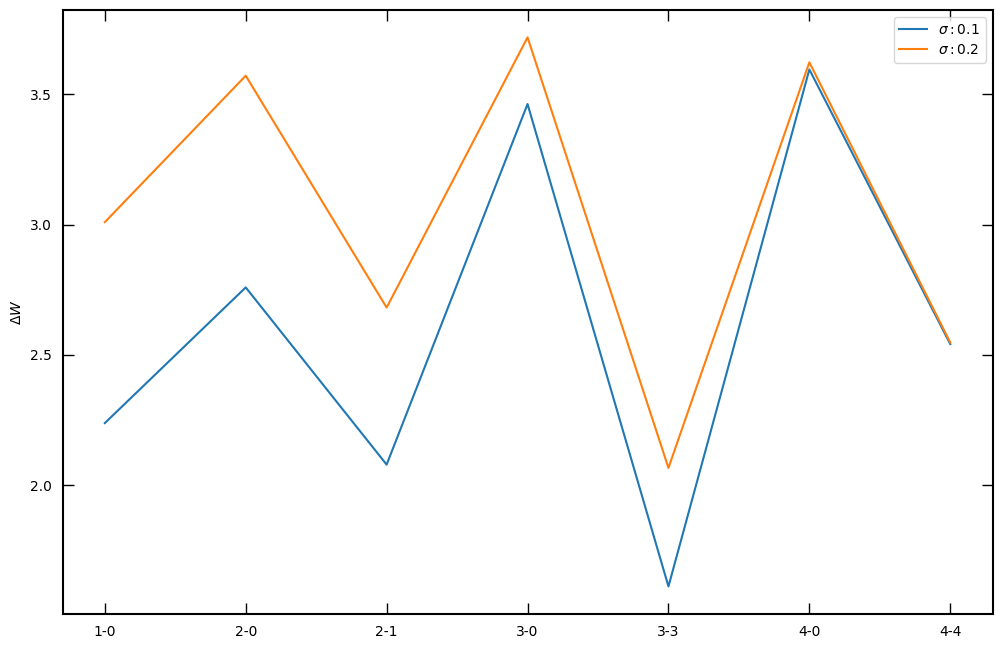

In [41]:
fig, axs = plt.subplots(1,1,figsize=(12,8), dpi=100)

for r in range(len(std_list)):
    axs.plot(np.arange(len(ergs)), deltaW[r, ::], label=r'$\sigma:$'+str(std_list[r]))
    axs.set_ylabel(r'$\Delta W$')

axs.legend()
axs.set_xticks(np.arange(len(charger_names)))
axs.set_xticklabels(charger_names)
    
for e in ['x', 'y']:
    axs.tick_params(axis=e,which='major',size=8,width=1,direction='in',top='on',right='on')

In [ ]:
np.save('gaussianHeisenberg.npy', (fids, ergs))